# Introduction

Dataset can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

The column names are contained in the following file https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

The original paper which published the dataset can be found here http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf

The census from which the dataset was built https://www2.census.gov/library/publications/decennial/1970/phc-1/39204513p3ch05.pdf

# Describe

In [1]:
# Import package that will enable opening of names file from url
from urllib.request import urlopen

# Open the names file and assign it to data
data = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names")

# Adapted from https://bugs.python.org/issue5419
# Decode the content of the names file and print the output
print(data.read().decode('utf-8'))

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [2]:
# Importing pandas
import pandas as pd

# Reading the tab-delimited dataset into a DataFile and adding column names from the housing.names file shown above
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

# Viewing the first five rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualising the dataset

### Scatter plots

The MEDV is the variable that we will be trying to predict using the keras machine learning library.

From the scatter plot below, there appears to be a negative correlation with house prices and the following: CRIM, INDUS, NOX, LSTAT, PTRATIO and possibly TAX.

There appears to be a positive correlation between house prices and RM

<Figure size 432x288 with 0 Axes>

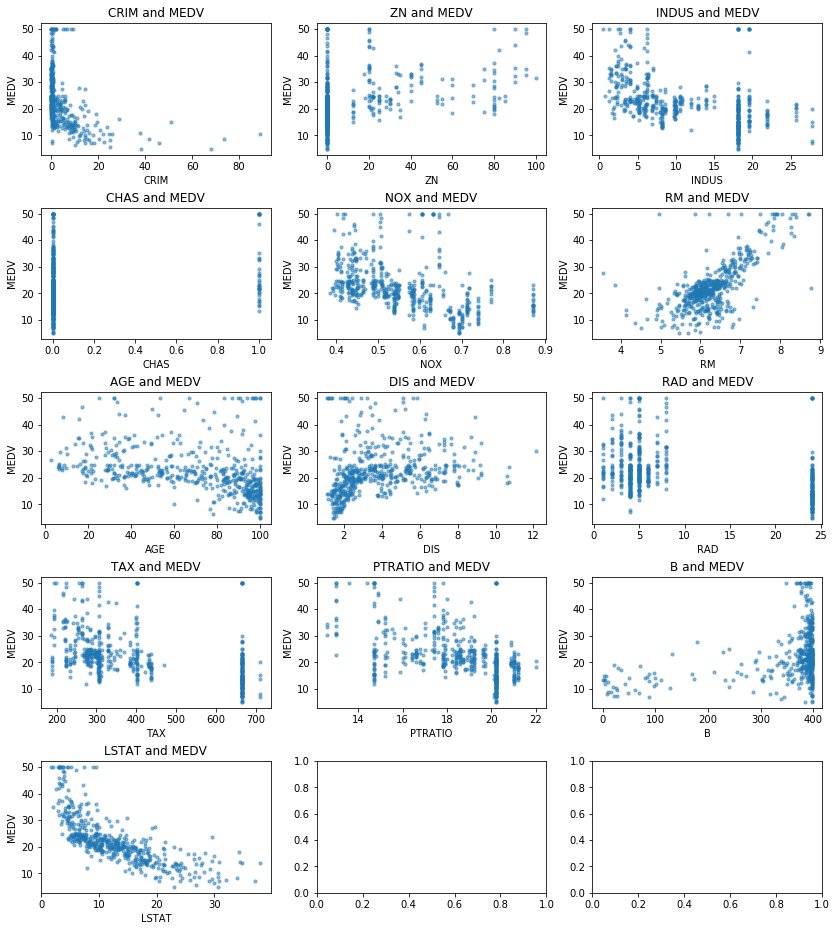

In [3]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

rows, cols = df.shape

for i in range(cols - 1):
    row, col = i // 3, i % 3
    axes[row][col].scatter(df.iloc[:, i], df.loc[:, "MEDV"], alpha=0.5, s=10)
    axes[row][col].set_title(df.columns[i] + ' and MEDV')
    axes[row][col].set_xlabel(df.columns[i])        
    axes[row][col].set_ylabel('MEDV')
plt.show()

### Creating a diagonal correlation heat map

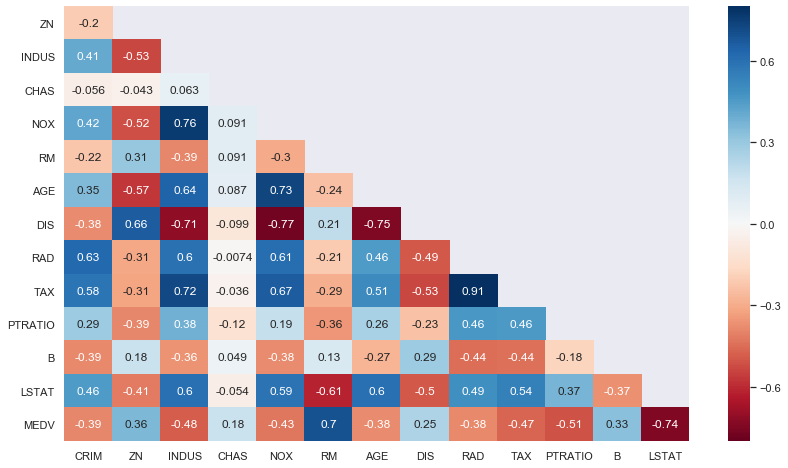

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix
corr = df.corr()

# Setting the size of the heat map
sns.set(rc={'figure.figsize':(14,8)})

# Adapted from https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True

# Creating the correlation heatmap
sns.heatmap(corr, annot=True, mask=mask,cmap='RdBu', vmin=-0.8, vmax=0.8)


# Adapted from https://github.com/mwaskom/seaborn/issues/1773
# Altered to fix blank row at top and at the right

# Changes to the y-axis
b, t= plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t += 0.5 # Add 0.5 to the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Changes to the x-axis
l, r = plt.xlim()
r -= 1 # Subtract 1 from the right
plt.xlim(l, r)

# Showing the heatmap
plt.show()

### Deciding which variables to look at

From the above the variables that strongly correlate with MEDV (either positively or negatively) are LSTAT (-0.74), PTRATIO (-0.51) and RM (0.70). The highest correlation between any two variables is 0.91 for RAD vs TAX. The lowest correlation between any two variables is -0.0075 for RAD vs CHAS. When comparing one variable against all other variables, the CHAS variable has the lowest correlation. The highest correlation between CHAS and any other variable is with MEDV at 0.18. In the next section we will look at using inferential statistics to determine if there is a significant difference in house prices between houses that are along the Charles River and those that aren't.

In the prediction section, I initially chose the variables that had the highest correlation to MEDV but then I found that I was able to get a much better result by using all the variables.

### Summary statistics

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

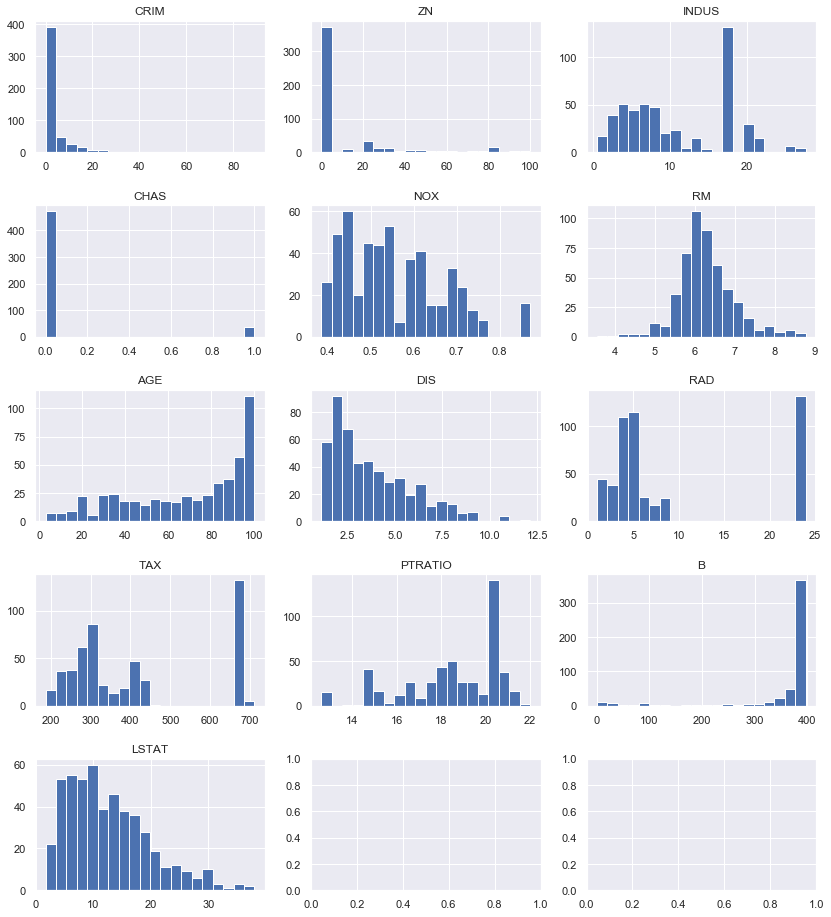

In [6]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

rows, cols = df.shape

for i in range(cols - 1):
    row, col = i // 3, i % 3
    axes[row][col].hist(df.iloc[:, i], bins=20)
    axes[row][col].set_title(df.columns[i])
    #axes[row][col].set_xlabel(df.columns[i])        
    #axes[row][col].set_ylabel('')
plt.show()

From the histogram we can see that the majority of towns (~400) have a crime rate of less than 4 per capita. From the summary statistics we can see that 75% of towns have a crime rate per capita of 3.7 but the mean is also close to this value at 3.6. This is due to a maximum value of 88.9 which is resulting in a right skew. The standard deviation for this is 8.6. 

For the B variable the opposite is true. From the histogram we can see that the majority (close to 400) are at the high end of the scale with a value greater than 375. From the summary stats we can see that the Q1 value is 375.4, the max is 396.9 and the minimum is 0.32. The mean (356.7) is close to the Q1 value (375.4). This attribute has a left skew.

These differences, along with the differences in correlations above, are important to note for later on when we try to fit the data to the neural network. Preprocessing the data to remove the correlations, create a zero mean and standard deviation of 1 will improve the performance of the neural network.

## Inferential Statistics

We are interested in determining if there is a significant difference in house prices between houses that are along the Charles River and those that aren't. The Boston House Prices dataset does not contain the data for the entire population of houses in Boston but instead contains a sample which are the median values for each town. We can use inferential statistics to make inferences about the population from the sample data [towardsdatascience-Inferential Statistics for Data Science](https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a). Inferential statistics can be used to determine the probability that there is a true relationship between two variables [Science Direct-Inferential Statistics](https://www.sciencedirect.com/topics/medicine-and-dentistry/inferential-statistics).  

### Selecting an appropriate test

#### Student t-test
There will be only one comparison made: MEDV for CHAS = 0 and MEDV for CHAS = 1. As there is only one comparison to be made an ANOVA isn't necessary in this case and a t-test will be sufficient.

We need to decide if a dependent or an independent t-test should be used. A dependent samples t-test is used when each entry is present in both samples. [Step by Step Solutions: T-tests: Paired/Dependent and Independent- RPubs](https://rpubs.com/raquelsbf/t-tests). As the towns that tract the Charles River are different to the towns that don't, then an independent Student t-test should be used here.

For an independent Student t-test the samples should be of equal size and have the same variance. [Wikipedia- Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test). In this case, as can be seen from below, the sample sizes are unequal with 471 and 35, and variances of 78.0 and 140.0, for those not along the Charles river and those along it respectively. Therefore, in this case a Student t-test is not appropriate.

#### Welch's t-test
Welch's t-test can be used in place of the Student t-test where the variance and/or sample sizes differ. [Wikipedia - Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test).

A requirement for both the Student t-test and the Welch t-test is that the distributions must be normal. [Wikipedia - Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test). However, as seen below, the distributions are not normal and therefore a Welch's t-test is not appropriate here either.

#### Mann-Whitney U test
As the data is not normally distributed a non-parametric test should be used. [University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests). The Mann-Whitney U test (or Wilcoxon rank-sum test) can be used for non-para-metric data to test for the difference between two independent variables.[University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests)


Although the Student t-test and Welch t-test aren't appropriate here, I've included them below to show how the values between these tests can vary.

#### Visualising the data to determine if they are normally distributed

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

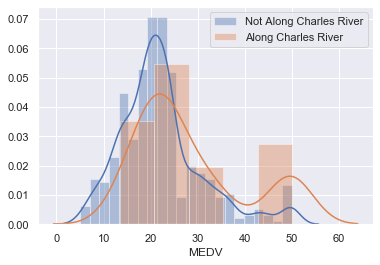

In [7]:
# Importing seaborn to create distplots
import seaborn as sns

sns.distplot(df["MEDV"][df["CHAS"] == 0], label="Not Along Charles River")
sns.distplot(df["MEDV"][df["CHAS"] == 1], label="Along Charles River")

plt.legend()

plt.show

In [8]:
# Importing stats module from scipy
from scipy import stats

# Determining if the distribution for tracts along Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 1])

(0.8359232544898987, 0.00011230883683310822)

In [9]:
# Determining if the distribution for tracts not along the Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 0])

(0.9282605051994324, 3.113930960958397e-14)

In [10]:
# Determining the mean for both groups
df["MEDV"].groupby(df["CHAS"]).mean()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

In [11]:
# Determining the count for both groups
df["MEDV"].groupby(df["CHAS"]).count()

CHAS
0    471
1     35
Name: MEDV, dtype: int64

In [12]:
# Determining the variance for both groups
df["MEDV"].groupby(df["CHAS"]).var()

CHAS
0     77.992962
1    139.633059
Name: MEDV, dtype: float64

In [13]:
# Determining the standard deviation for both groups
df["MEDV"].groupby(df["CHAS"]).std()

CHAS
0     8.831362
1    11.816643
Name: MEDV, dtype: float64

### Student t-test

The p-value for the Student t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [14]:
# Code for Student t-test

from scipy.stats import ttest_ind as tti

stti_stat, stti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=True)

stti_p

7.390623170519905e-05

### Welch t-test

The p-value for the Welch t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [15]:
# Code for Welch t-test

from scipy.stats import ttest_ind as tti

wtti_stat, wtti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=False)

wtti_p

0.003567170098137517

### Mann-Whitney U test 

The p-value for the Mann-Whitney U test is less than 0.05 which strongly suggests that the sample distributions are different.

In [16]:
# Code for Mann-Whitney U test

from scipy.stats import mannwhitneyu as mwu

mwu(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1])

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

## Predicting the Median Value of Owner-Occupied Homes
This is a regression predictive modeling problem. Regression predictive modeling problems involve predicting a real-valued quantity [machinelearningmastery - How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

Here we will try to predict the median value of owner-occupied homes by providing the values to the remaining attributes of the dataset to a neural network developed using the [Keras](https://keras.io/) package. Keras is an open-source neural network package which can run on top of TensorFlow as well as other packages. [Wikipedia - Keras](https://en.wikipedia.org/wiki/Keras)

![Neuron](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png "Neuron")

Neural networks are alorgithms that are modelled on the human brain[Skymind - A Beginner's Guide to Neural Networks and Deep Learning](https://skymind.ai/wiki/neural-network). The human brain is composed of neurons which can recieve inputs via dendrites and can output signals via axon terminals.[Wikipedia - Artificial neural network](https://en.wikipedia.org/wiki/Artificial_neural_network) Neural networks, when given a dataset to train on, can make predictions about that dataset. [Skymind - A Beginner's Guide to Neural Networks and Deep Learning](https://skymind.ai/wiki/neural-network). In this example, we will train the neural network with the training dataset, then we will provide the test inputs and make predictions about what the outputs will be. We can then compare the predicted outputs against the test outputs. We can determine how much each predicted output varys from the test output by squaring the difference between these and then getting the mean of those values. That will give us the Mean Squared Error (MSE). The Root Mean Squared Error (RMSE) can then be got by getting the square root of the MSE. The performance of the neural network will be measured by the RMSE, with a small RMSE meaning that it is performing well.

![Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/296px-Colored_neural_network.svg.png "Neural Network")



### Preparing the data for the neural network

Creating separate columns for true and false values for CHAS

In [17]:
import numpy as np

# Adapted from course materials
df["CHAS_True"] = df["CHAS"]
df["CHAS_False"] = (df["CHAS"] == 0).astype(np.int)

Separating the data into the independent variables and the target variable 'MEDV'. Dropping the 'CHAS' variable from the input as this is included in the 'CHAS_True' and 'CHAS_False' variables created above

In [18]:
# Input/independent variables
X = df.drop(columns=["MEDV", "CHAS"])

# Output/dependent variable
y = df["MEDV"]

In [19]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0,1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0,1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0,1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0,1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0,1


In [20]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

#### Splitting datasets into random train and test subsets

Setting the test size to 33% of the dataset

In [21]:
# Importing train test split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the output and input datasets into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [22]:
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
233,0.33147,0.0,6.20,0.507,8.247,70.4,3.6519,8,307.0,17.4,378.95,3.95,0,1
248,0.16439,22.0,5.86,0.431,6.433,49.1,7.8265,7,330.0,19.1,374.71,9.52,0,1
445,10.67180,0.0,18.10,0.740,6.459,94.8,1.9879,24,666.0,20.2,43.06,23.98,0,1
376,15.28800,0.0,18.10,0.671,6.649,93.3,1.3449,24,666.0,20.2,363.02,23.24,0,1
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3,252.0,18.3,395.63,4.32,0,1


In [23]:
X_test.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
388,14.33370,0.0,18.10,0.700,4.880,100.0,1.5895,24,666.0,20.2,372.92,30.62,0,1
43,0.15936,0.0,6.91,0.448,6.211,6.5,5.7209,3,233.0,17.9,394.46,7.44,0,1
150,1.65660,0.0,19.58,0.871,6.122,97.3,1.6180,5,403.0,14.7,372.80,14.10,0,1
416,10.83420,0.0,18.10,0.679,6.782,90.8,1.8195,24,666.0,20.2,21.57,25.79,0,1
453,8.24809,0.0,18.10,0.713,7.393,99.3,2.4527,24,666.0,20.2,375.87,16.74,0,1


In [24]:
y_train.head()

233    48.3
248    24.5
445    11.8
376    13.9
39     30.8
Name: MEDV, dtype: float64

In [25]:
y_test.head()

388    10.2
43     24.7
150    21.5
416     7.5
453    17.8
Name: MEDV, dtype: float64

### Preprocessing the dataset

#### Scaling the dataset

Machine learning algorithms can sometimes perform poorly if the dataset is not first standarized [scikit learn - Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html). Using the [sklearn](https://scikit-learn.org/stable/modules/preprocessing.html) StandardScaler function, which removes the mean value from each feature and then divides by them by their standard deviation in order to scale them [scikit learn - Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html).

In [26]:
# Adapted from course materials
import pandas as pd
import sklearn.preprocessing as pre
import numpy as np


scaler = pre.StandardScaler()
scaler.fit(X_train)

scaled_X_train =  pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [27]:
round(scaled_X_train.describe(), 2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
count,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.43,-0.50,-1.57,-1.40,-3.47,-2.26,-1.32,-0.98,-1.31,-2.64,-4.41,-1.51,-0.24,-4.10
25%,-0.42,-0.50,-0.88,-0.90,-0.55,-0.79,-0.83,-0.64,-0.76,-0.72,0.18,-0.80,-0.24,0.24
50%,-0.40,-0.50,-0.20,-0.22,-0.12,0.25,-0.22,-0.52,-0.46,0.20,0.37,-0.16,-0.24,0.24
75%,-0.03,0.32,1.05,0.65,0.46,0.94,0.70,1.68,1.56,0.84,0.43,0.63,-0.24,0.24
max,10.44,3.83,2.48,2.81,3.43,1.15,3.37,1.68,1.83,1.67,0.44,3.59,4.10,0.24


#### Whitening the dataset

A dataset can be whitened by using Principal Components Analysis, which is used for dimensionality reduction [Stanford University - PCA Whitening](http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/). Whitening the dataset will have the effect of uncorrelating the variables [Wikipedia - Whitening transformation](https://en.wikipedia.org/wiki/Whitening_transformation)

In [28]:
# Adapted from course materials
import sklearn.decomposition as dec
pca = dec.PCA(n_components=len(X_train.columns), whiten=True)
pca.fit(X_train)

whitened_X_train = pd.DataFrame(pca.transform(X_train), columns=X_train.columns)
whitened_X_test = pd.DataFrame(pca.transform(X_test), columns=X_test.columns)

In [29]:
round(whitened_X_train.corr())

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
CRIM,1.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
ZN,0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
INDUS,-0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
NOX,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
RM,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
AGE,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
DIS,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
RAD,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
TAX,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0
PTRATIO,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,0.0


#### Combining Whitening with Scaling

In [30]:
# Adapted from course materials
import sklearn.decomposition as dec
pca = dec.PCA(n_components=len(scaled_X_train.columns), whiten=True)
pca.fit(scaled_X_train)

whitenedAndScaled_X_train = pd.DataFrame(pca.transform(scaled_X_train), columns=scaled_X_train.columns)
whitenedAndScaled_X_test = pd.DataFrame(pca.transform(scaled_X_test), columns=scaled_X_test.columns)

### Defining the neural net

The input dimensions have been set to the number of columns in the input dataset. The first hidden layer is set at twice the input size. The next layer is equal in size to the input layer. The output has been set to 1. The whitened dataset above has been chosen based on further testing done below which appears to give the best RMSE out of either the whitened/scaled/whitened and scaled datasets.

All layers are using the Rectified Linear Unit (ReLU) activation function. Other activation functions didn't appear to give as good a result but maybe different combinations of activation functions might have. The ReLU activation function produces a zero output for all negative inputs and a positive linear output for postive inputs [Medium - A Practical Guide to ReLU](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7)

In [31]:
# Adapted from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Importing packages
from keras.models import Sequential
from keras.layers import Dense

# Determining the size of the input
inputSize = len(whitened_X_train.columns)

# Defining the neural network
model = Sequential()
model.add(Dense(2*inputSize, input_dim=inputSize, activation='relu'))
model.add(Dense(inputSize, activation='relu'))
model.add(Dense(1, activation='relu'))

Using TensorFlow backend.


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


### Compiling the neural net

As this is a regression problem, a Regression Loss Function will be used. Setting this to a Mean Squared Error Loss function.

In [33]:
# Compiling the neural net
model.compile(loss='mean_squared_error', optimizer='adam')

### Fitting the neural net to the training dataset

In [34]:
# Fitting the neural net
model.fit(whitened_X_train, y_train, epochs=150, batch_size=8)

Epoch 1/150
339/339 [==============================] - 0s 1ms/step - loss: 545.6889
Epoch 2/150
339/339 [==============================] - 0s 643us/step - loss: 442.0914
Epoch 3/150
339/339 [==============================] - 0s 601us/step - loss: 328.5016
Epoch 4/150
339/339 [==============================] - 0s 463us/step - loss: 224.8695
Epoch 5/150
339/339 [==============================] - 0s 504us/step - loss: 169.1865
Epoch 6/150
339/339 [==============================] - 0s 442us/step - loss: 140.8325
Epoch 7/150
339/339 [==============================] - 0s 1ms/step - loss: 118.3348
Epoch 8/150
339/339 [==============================] - 0s 920us/step - loss: 96.1386
Epoch 9/150
339/339 [==============================] - 0s 883us/step - loss: 77.4121
Epoch 10/150
339/339 [==============================] - 0s 767us/step - loss: 61.1148
Epoch 11/150
339/339 [==============================] - 0s 413us/step - loss: 49.0143
Epoch 12/150
339/339 [==============================] - 0s 3

339/339 [==============================] - 0s 289us/step - loss: 5.9713
Epoch 96/150
339/339 [==============================] - 0s 283us/step - loss: 5.8509
Epoch 97/150
339/339 [==============================] - 0s 313us/step - loss: 5.8134
Epoch 98/150
339/339 [==============================] - 0s 242us/step - loss: 6.0163
Epoch 99/150
339/339 [==============================] - 0s 248us/step - loss: 5.7624
Epoch 100/150
339/339 [==============================] - 0s 292us/step - loss: 5.6270
Epoch 101/150
339/339 [==============================] - 0s 271us/step - loss: 5.6068
Epoch 102/150
339/339 [==============================] - 0s 333us/step - loss: 5.5033
Epoch 103/150
339/339 [==============================] - 0s 262us/step - loss: 5.4150
Epoch 104/150
339/339 [==============================] - 0s 247us/step - loss: 5.4031
Epoch 105/150
339/339 [==============================] - 0s 251us/step - loss: 5.3835
Epoch 106/150
339/339 [==============================] - 0s 277us/step -

### Predicting the output for test dataset

In [35]:
y_predicted = model.predict(whitened_X_test)

y_predicted[0:5]

array([[11.326199],
       [23.301474],
       [19.884974],
       [14.645249],
       [19.015512]], dtype=float32)

### Evaluating the neural net

In [36]:
# Get the MSE
mse = model.evaluate(whitened_X_test, y_test) 
    
# Get the RMSE by getting the square root of the MSE
rmse = mse ** 0.5

rmse

167/167 [==============================] - 0s 209us/step


4.165304727207306

### Creating a function for the machine learning algorithm

In [37]:
def neuralNet(XTrain, XTest, yTrain, yTest):
    # Importing packages
    from keras.models import Sequential
    from keras.layers import Dense

    # Defining the neural network
    model = Sequential()
    model.add(Dense(28, input_dim=len(XTrain.columns), activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    
    
    # Adapted from https://keras.io/visualization/
    # Fitting the neural net
    history = model.fit(XTrain, yTrain, epochs=150, validation_data=(XTest, yTest), batch_size=8, verbose=0)
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # Get the MSE
    mse = model.evaluate(XTest, yTest) 
    
    # Get the RMSE by getting the square root of the MSE
    rmse = mse ** 0.5
    
    return rmse

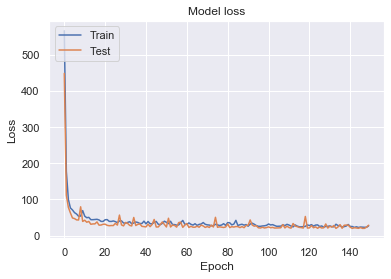

167/167 [==============================] - 0s 66us/step


5.364614046574141

In [38]:
neuralNet(X_train, X_test, y_train, y_test)

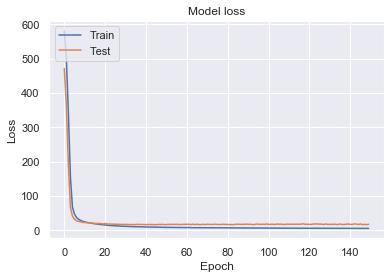

167/167 [==============================] - 0s 90us/step


4.236663543144995

In [39]:
neuralNet(scaled_X_train, scaled_X_test, y_train, y_test)

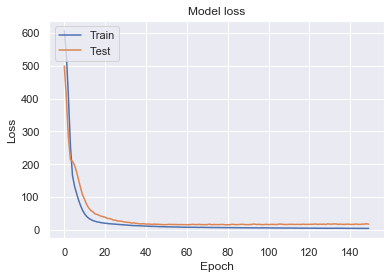

167/167 [==============================] - 0s 72us/step


4.103118862603995

In [40]:
neuralNet(whitened_X_train, whitened_X_test, y_train, y_test)

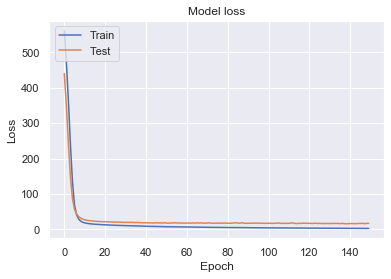

167/167 [==============================] - 0s 48us/step


4.121769226354378

In [41]:
neuralNet(whitenedAndScaled_X_train, whitenedAndScaled_X_test, y_train, y_test)